In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns

In [9]:
df1 = pd.read_csv("/Users/maha/Downloads/ChicagoCrimeData.csv")
df2 = pd.read_csv("/Users/maha/Downloads/ChicagoPublicSchools.csv")
df3 = pd.read_csv("/Users/maha/Downloads/ChicagoCensusData.csv")

# Total number of crimes recorded in the CRIME table

In [10]:
sqldf("SELECT COUNT(*) FROM df1", globals())

,COUNT(*)
0,533


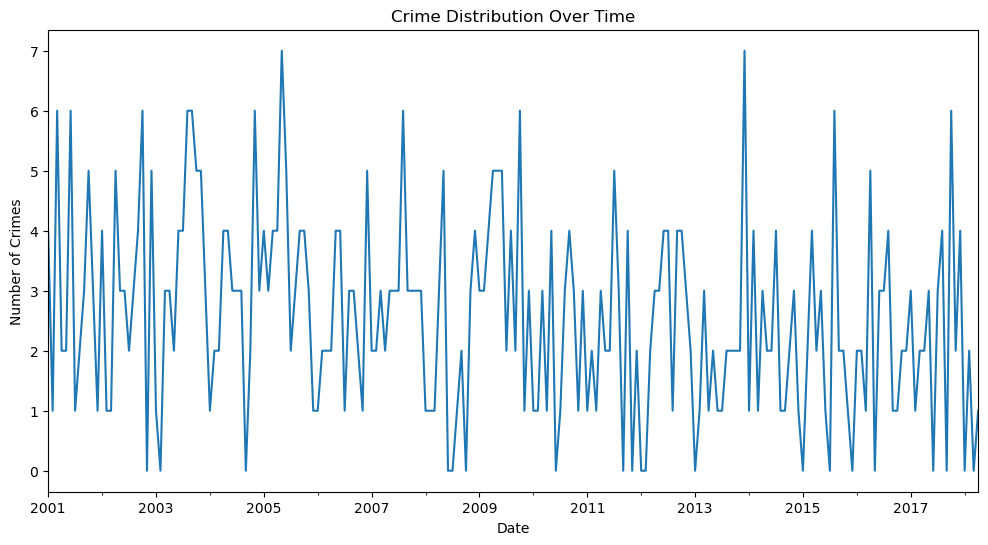

In [11]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Plotting the number of crimes over time
plt.figure(figsize=(12, 6))
df1.resample('M', on='DATE').size().plot()
plt.title('Crime Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

533 total reported crimes over a span of 18 years

# Community areas with per capita income less than 11000

In [12]:
sqldf("SELECT COMMUNITY_AREA_NAME FROM df3 WHERE PER_CAPITA_INCOME < 11000")

,COMMUNITY_AREA_NAME
0,West Garfield Park
1,South Lawndale
2,Fuller Park
3,Riverdale


The community areas with per capita income less than 11000 are West Garfield Park, South Lawndale, Fuller Park, and Riverdale

# All case numbers for crimes involving minors

In [13]:
sqldf("SELECT CASE_NUMBER FROM df1 WHERE DESCRIPTION LIKE '%CHILD%'")

,CASE_NUMBER
0,HN567387
1,HR391350
2,HN144152


There are three crimes involving minors and their case numbers are:  HN567387, HR391350, and HN144152.

# All kidnapping crimes involving a child

In [14]:
sqldf("SELECT * FROM df1 WHERE (PRIMARY_TYPE LIKE '%KIDNAP%') & (DESCRIPTION LIKE '%CHILD%')")

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,5276766,HN144152,2007-01-26 00:00:00.000000,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,...,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.874908,-87.750249,"(41.874908413, -87.750249307)"


There is one reported kidnapping involving a child.

# Types of crimes reported at schools 

In [15]:
sqldf("SELECT PRIMARY_TYPE FROM df1 WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%'")

,PRIMARY_TYPE
0,BATTERY
1,BATTERY
2,BATTERY
3,BATTERY
4,BATTERY
5,CRIMINAL DAMAGE
6,NARCOTICS
7,NARCOTICS
8,ASSAULT
9,CRIMINAL TRESPASS


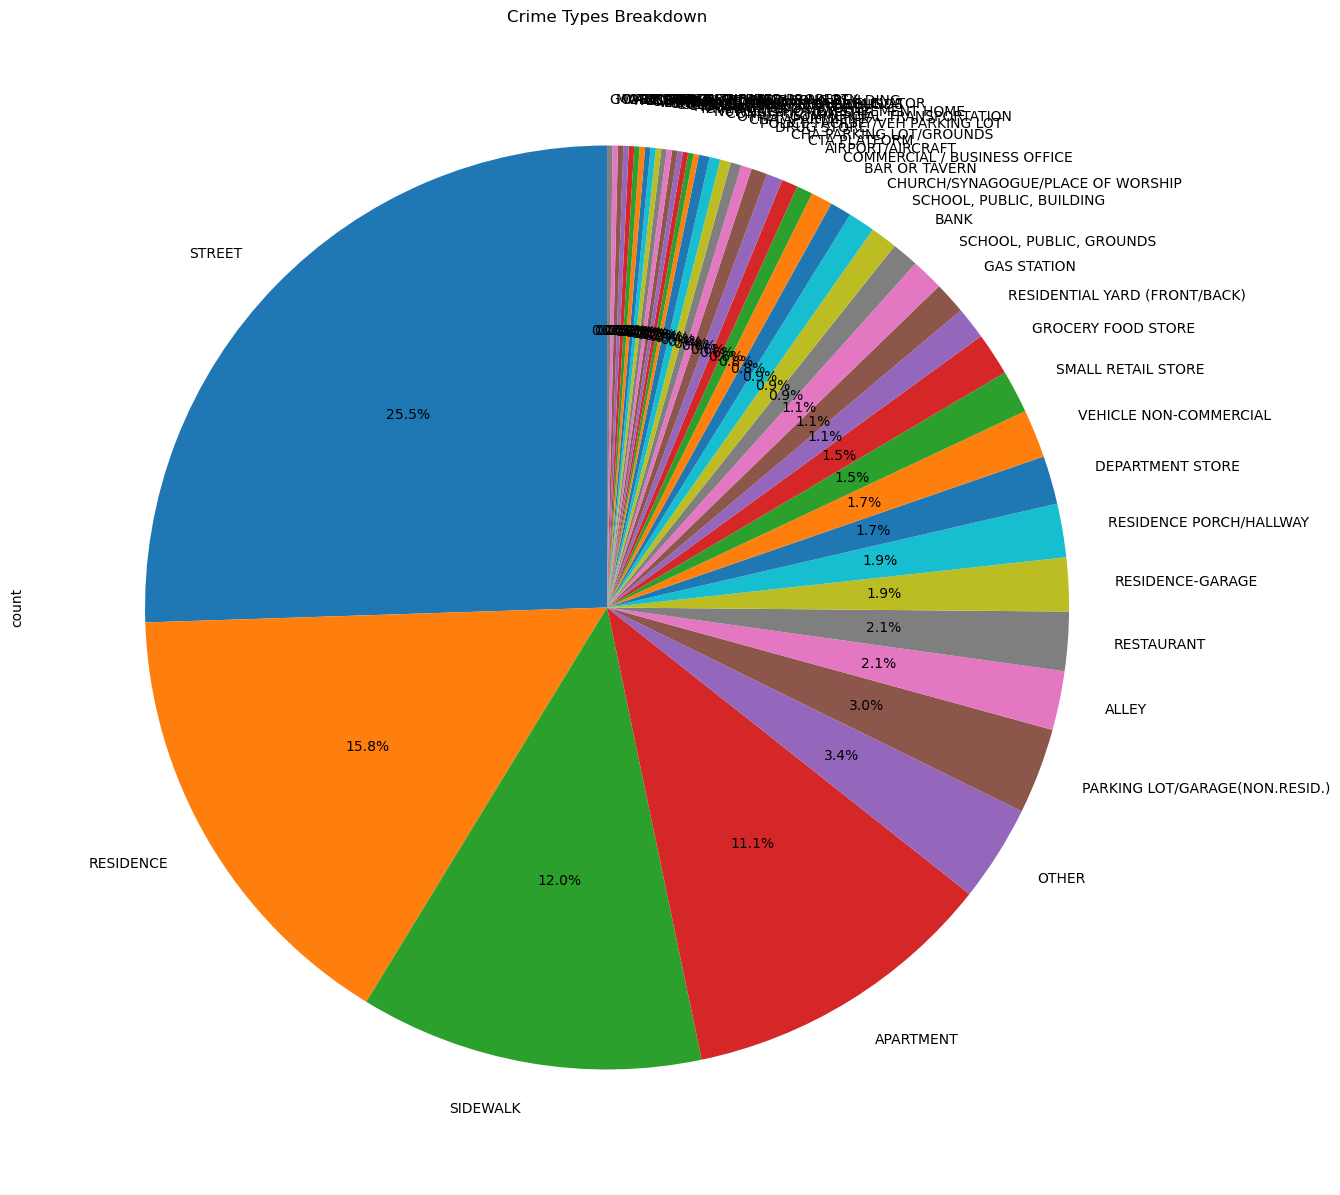

In [16]:
plt.figure(figsize=(15, 15))
df1['LOCATION_DESCRIPTION'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Crime Types Breakdown')
plt.show()

12 crimes or 1.1% of crimes took place on school grounds.

# Average safety score for all types of schools

In [17]:
sqldf("SELECT AVG(SAFETY_SCORE) AS AVG_SAFETY_SCORE FROM df2")

,AVG_SAFETY_SCORE
0,49.504873


The average safety score is around 50 for all types of schools.

# Five community areas with the highest % of households below the poverty line

In [18]:
sqldf("SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM df3 ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5")

,COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
0,Riverdale,56.5
1,Fuller Park,51.2
2,Englewood,46.6
3,North Lawndale,43.1
4,East Garfield Park,42.4


# Community area (number) that is the most crime-prone

In [19]:
sqldf("SELECT COMMUNITY_AREA_NUMBER, LONGITUDE, LATITUDE FROM df1 GROUP BY COMMUNITY_AREA_NUMBER")

,COMMUNITY_AREA_NUMBER,LONGITUDE,LATITUDE
0,NaN,-87.675414,41.810834
1,1.0,-87.677996,42.007012
2,2.0,-87.700467,41.997545
3,3.0,-87.657637,41.969826
4,4.0,-87.700489,41.969389
...,...,...,...
66,72.0,-87.689179,41.711281
67,73.0,-87.642757,41.704455
68,75.0,-87.663303,41.694422
69,76.0,-87.905227,41.976290


In [4]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/a5/40/f25a33d54825d52f8b7f53adf8cb6d8f554179feb942bf2983c8b440decf/fiona-1.9.5-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 514.4 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/84/a6/a300c1b14b2112e966e9f90b18f9c13b586bdcf417207cee913ae9005da3/pyproj-3.6.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/81/50/c7768a0a71c012464927228b6b949e55ad8d7ed50325b56b7224ea7dc7a6/shapely-2.0.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [29]:
import geopandas as gpd
from shapely.geometry import Point

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


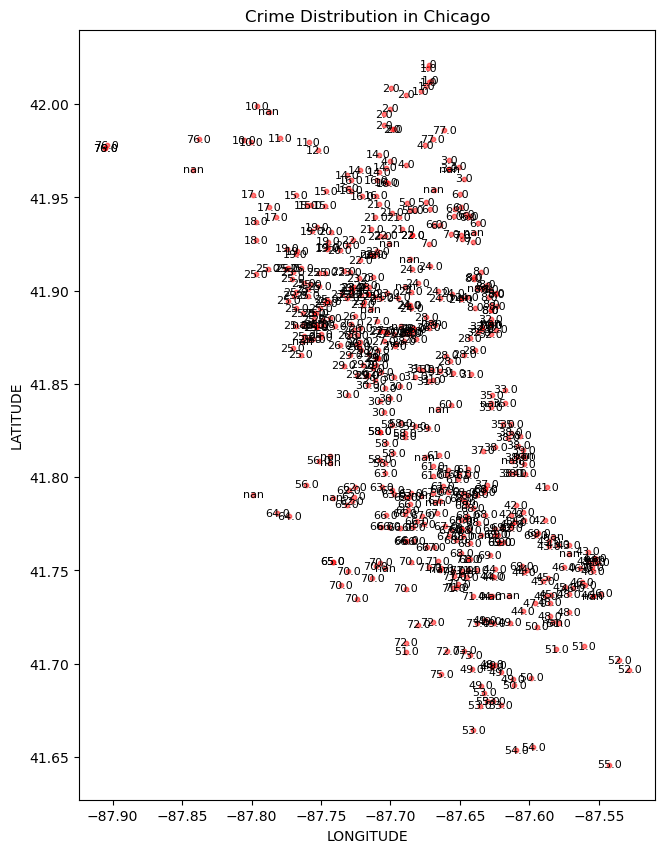

In [42]:
geometry = [Point(xy) for xy in zip(df1['LONGITUDE'], df1['LATITUDE'])]
crime_gdf = gpd.GeoDataFrame(df1, geometry=geometry, crs='EPSG:4326')

# Plotting the GeoDataFrame to visualize crime locations
fig, ax = plt.subplots(figsize=(15, 10))
crime_gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)
for (x,y,community_area_number) in zip(crime_gdf.geometry.x, crime_gdf.geometry.y, crime_gdf['COMMUNITY_AREA_NUMBER']):
        ax.text(x, y, str(community_area_number), fontsize=8, ha='center', va='center')
ax.set_title('Crime Distribution in Chicago')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

# Name of the community area with the highest hardship index

In [48]:
sqldf("SELECT COMMUNITY_AREA_NAME,HARDSHIP_INDEX FROM df3 WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM df3)")

,COMMUNITY_AREA_NAME,HARDSHIP_INDEX
0,Riverdale,98.0


# Community Area Name with the most number of crimes

In [58]:
sqldf("SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER FROM df3 WHERE COMMUNITY_AREA_NUMBER = (SELECT COMMUNITY_AREA_NUMBER FROM df1 GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 1)")

,COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER
0,Austin,25.0
